In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import string

In [2]:
f = open("logs/cars/log.txt", "r") 


Epoch=np.array([])
Loss=np.array([])
Acc=np.array([])
Lr=np.array([])
i=0
for line in f:
        if "Acc" in line:
            print(line)
            word= line.split(' ')
            i=+1
            print(word[7])
            acc=float(word[9][:-1])
            Acc=np.append(Acc,acc)
            
            loss=float(word[7][:-1])
            Loss=np.append(Loss,loss)
            
            lr=float(word[12])
            Lr=np.append(Lr,lr)
            
            
            if line[57] == "]":
                Epoch = np.append(Epoch,line[56])
            else:
                Epoch = np.append(Epoch,line[56:58])


2020-05-17 14:37:02,592 reid_baseline.train INFO: Epoch[1] Iteration[20/1772] Loss: 10.619, Acc: 0.000, Base Lr: 3.82e-05

10.619,
2020-05-17 14:37:09,422 reid_baseline.train INFO: Epoch[1] Iteration[40/1772] Loss: 10.451, Acc: 0.000, Base Lr: 3.82e-05

10.451,
2020-05-17 14:37:16,267 reid_baseline.train INFO: Epoch[1] Iteration[60/1772] Loss: 10.288, Acc: 0.004, Base Lr: 3.82e-05

10.288,
2020-05-17 14:37:23,143 reid_baseline.train INFO: Epoch[1] Iteration[80/1772] Loss: 10.119, Acc: 0.007, Base Lr: 3.82e-05

10.119,
2020-05-17 14:37:30,093 reid_baseline.train INFO: Epoch[1] Iteration[100/1772] Loss: 9.962, Acc: 0.010, Base Lr: 3.82e-05

9.962,
2020-05-17 14:37:37,158 reid_baseline.train INFO: Epoch[1] Iteration[120/1772] Loss: 9.813, Acc: 0.011, Base Lr: 3.82e-05

9.813,
2020-05-17 14:37:44,314 reid_baseline.train INFO: Epoch[1] Iteration[140/1772] Loss: 9.708, Acc: 0.012, Base Lr: 3.82e-05

9.708,
2020-05-17 14:37:51,539 reid_baseline.train INFO: Epoch[1] Iteration[160/1772] Loss: 9

2020-05-17 15:54:10,587 reid_baseline.train INFO: Epoch[7] Iteration[1080/1768] Loss: 2.584, Acc: 0.704, Base Lr: 2.46e-04

2.584,
2020-05-17 15:54:18,594 reid_baseline.train INFO: Epoch[7] Iteration[1100/1768] Loss: 2.585, Acc: 0.701, Base Lr: 2.46e-04

2.585,
2020-05-17 15:54:26,583 reid_baseline.train INFO: Epoch[7] Iteration[1120/1768] Loss: 2.615, Acc: 0.695, Base Lr: 2.46e-04

2.615,
2020-05-17 15:54:34,432 reid_baseline.train INFO: Epoch[7] Iteration[1140/1768] Loss: 2.621, Acc: 0.698, Base Lr: 2.46e-04

2.621,
2020-05-17 15:54:42,379 reid_baseline.train INFO: Epoch[7] Iteration[1160/1768] Loss: 2.564, Acc: 0.715, Base Lr: 2.46e-04

2.564,
2020-05-17 15:54:50,291 reid_baseline.train INFO: Epoch[7] Iteration[1180/1768] Loss: 2.587, Acc: 0.712, Base Lr: 2.46e-04

2.587,
2020-05-17 15:54:58,252 reid_baseline.train INFO: Epoch[7] Iteration[1200/1768] Loss: 2.564, Acc: 0.712, Base Lr: 2.46e-04

2.564,
2020-05-17 15:55:06,107 reid_baseline.train INFO: Epoch[7] Iteration[1220/1768] Los

2020-05-17 17:16:45,308 reid_baseline.train INFO: Epoch[14] Iteration[1200/1775] Loss: 2.124, Acc: 0.830, Base Lr: 3.50e-04

2.124,
2020-05-17 17:16:53,238 reid_baseline.train INFO: Epoch[14] Iteration[1220/1775] Loss: 2.107, Acc: 0.835, Base Lr: 3.50e-04

2.107,
2020-05-17 17:17:01,169 reid_baseline.train INFO: Epoch[14] Iteration[1240/1775] Loss: 2.071, Acc: 0.842, Base Lr: 3.50e-04

2.071,
2020-05-17 17:17:09,069 reid_baseline.train INFO: Epoch[14] Iteration[1260/1775] Loss: 2.084, Acc: 0.836, Base Lr: 3.50e-04

2.084,
2020-05-17 17:17:16,953 reid_baseline.train INFO: Epoch[14] Iteration[1280/1775] Loss: 2.028, Acc: 0.847, Base Lr: 3.50e-04

2.028,
2020-05-17 17:17:24,946 reid_baseline.train INFO: Epoch[14] Iteration[1300/1775] Loss: 1.989, Acc: 0.857, Base Lr: 3.50e-04

1.989,
2020-05-17 17:17:32,907 reid_baseline.train INFO: Epoch[14] Iteration[1320/1775] Loss: 2.048, Acc: 0.834, Base Lr: 3.50e-04

2.048,
2020-05-17 17:17:40,747 reid_baseline.train INFO: Epoch[14] Iteration[1340/1

2020-05-17 18:34:28,384 reid_baseline.train INFO: Epoch[21] Iteration[440/1774] Loss: 2.058, Acc: 0.837, Base Lr: 3.50e-04

2.058,
2020-05-17 18:34:36,245 reid_baseline.train INFO: Epoch[21] Iteration[460/1774] Loss: 2.032, Acc: 0.850, Base Lr: 3.50e-04

2.032,
2020-05-17 18:34:44,312 reid_baseline.train INFO: Epoch[21] Iteration[480/1774] Loss: 1.997, Acc: 0.847, Base Lr: 3.50e-04

1.997,
2020-05-17 18:34:52,273 reid_baseline.train INFO: Epoch[21] Iteration[500/1774] Loss: 1.963, Acc: 0.861, Base Lr: 3.50e-04

1.963,
2020-05-17 18:35:00,167 reid_baseline.train INFO: Epoch[21] Iteration[520/1774] Loss: 1.964, Acc: 0.863, Base Lr: 3.50e-04

1.964,
2020-05-17 18:35:08,702 reid_baseline.train INFO: Epoch[21] Iteration[540/1774] Loss: 1.981, Acc: 0.859, Base Lr: 3.50e-04

1.981,
2020-05-17 18:35:16,579 reid_baseline.train INFO: Epoch[21] Iteration[560/1774] Loss: 1.961, Acc: 0.859, Base Lr: 3.50e-04

1.961,
2020-05-17 18:35:24,542 reid_baseline.train INFO: Epoch[21] Iteration[580/1774] Los

2020-05-17 19:51:04,304 reid_baseline.train INFO: Epoch[27] Iteration[1300/1774] Loss: 1.813, Acc: 0.886, Base Lr: 3.50e-04

1.813,
2020-05-17 19:51:12,256 reid_baseline.train INFO: Epoch[27] Iteration[1320/1774] Loss: 1.818, Acc: 0.897, Base Lr: 3.50e-04

1.818,
2020-05-17 19:51:20,872 reid_baseline.train INFO: Epoch[27] Iteration[1340/1774] Loss: 1.824, Acc: 0.895, Base Lr: 3.50e-04

1.824,
2020-05-17 19:51:28,677 reid_baseline.train INFO: Epoch[27] Iteration[1360/1774] Loss: 1.814, Acc: 0.894, Base Lr: 3.50e-04

1.814,
2020-05-17 19:51:36,512 reid_baseline.train INFO: Epoch[27] Iteration[1380/1774] Loss: 1.842, Acc: 0.884, Base Lr: 3.50e-04

1.842,
2020-05-17 19:51:44,508 reid_baseline.train INFO: Epoch[27] Iteration[1400/1774] Loss: 1.805, Acc: 0.894, Base Lr: 3.50e-04

1.805,
2020-05-17 19:51:52,421 reid_baseline.train INFO: Epoch[27] Iteration[1420/1774] Loss: 1.801, Acc: 0.892, Base Lr: 3.50e-04

1.801,
2020-05-17 19:52:00,355 reid_baseline.train INFO: Epoch[27] Iteration[1440/1

2020-05-17 21:00:07,822 reid_baseline.train INFO: Epoch[33] Iteration[1080/1771] Loss: 1.880, Acc: 0.887, Base Lr: 3.50e-04

1.880,
2020-05-17 21:00:15,716 reid_baseline.train INFO: Epoch[33] Iteration[1100/1771] Loss: 1.855, Acc: 0.882, Base Lr: 3.50e-04

1.855,
2020-05-17 21:00:23,535 reid_baseline.train INFO: Epoch[33] Iteration[1120/1771] Loss: 1.857, Acc: 0.879, Base Lr: 3.50e-04

1.857,
2020-05-17 21:00:31,413 reid_baseline.train INFO: Epoch[33] Iteration[1140/1771] Loss: 1.819, Acc: 0.894, Base Lr: 3.50e-04

1.819,
2020-05-17 21:00:39,279 reid_baseline.train INFO: Epoch[33] Iteration[1160/1771] Loss: 1.822, Acc: 0.893, Base Lr: 3.50e-04

1.822,
2020-05-17 21:00:47,132 reid_baseline.train INFO: Epoch[33] Iteration[1180/1771] Loss: 1.787, Acc: 0.901, Base Lr: 3.50e-04

1.787,
2020-05-17 21:00:54,976 reid_baseline.train INFO: Epoch[33] Iteration[1200/1771] Loss: 1.804, Acc: 0.896, Base Lr: 3.50e-04

1.804,
2020-05-17 21:01:02,895 reid_baseline.train INFO: Epoch[33] Iteration[1220/1

1.757,
2020-05-17 21:59:50,914 reid_baseline.train INFO: Epoch[38] Iteration[1300/1775] Loss: 1.757, Acc: 0.909, Base Lr: 3.50e-04

1.757,
2020-05-17 21:59:58,755 reid_baseline.train INFO: Epoch[38] Iteration[1320/1775] Loss: 1.746, Acc: 0.911, Base Lr: 3.50e-04

1.746,
2020-05-17 22:00:06,585 reid_baseline.train INFO: Epoch[38] Iteration[1340/1775] Loss: 1.759, Acc: 0.911, Base Lr: 3.50e-04

1.759,
2020-05-17 22:00:14,481 reid_baseline.train INFO: Epoch[38] Iteration[1360/1775] Loss: 1.786, Acc: 0.906, Base Lr: 3.50e-04

1.786,
2020-05-17 22:00:22,287 reid_baseline.train INFO: Epoch[38] Iteration[1380/1775] Loss: 1.807, Acc: 0.901, Base Lr: 3.50e-04

1.807,
2020-05-17 22:00:30,119 reid_baseline.train INFO: Epoch[38] Iteration[1400/1775] Loss: 1.777, Acc: 0.904, Base Lr: 3.50e-04

1.777,
2020-05-17 22:00:37,921 reid_baseline.train INFO: Epoch[38] Iteration[1420/1775] Loss: 1.765, Acc: 0.907, Base Lr: 3.50e-04

1.765,
2020-05-17 22:00:45,808 reid_baseline.train INFO: Epoch[38] Iteration

1.343,
2020-05-17 22:48:50,465 reid_baseline.train INFO: Epoch[42] Iteration[1680/1772] Loss: 1.359, Acc: 0.982, Base Lr: 3.50e-05

1.359,
2020-05-17 22:48:58,328 reid_baseline.train INFO: Epoch[42] Iteration[1700/1772] Loss: 1.371, Acc: 0.981, Base Lr: 3.50e-05

1.371,
2020-05-17 22:49:06,180 reid_baseline.train INFO: Epoch[42] Iteration[1720/1772] Loss: 1.349, Acc: 0.984, Base Lr: 3.50e-05

1.349,
2020-05-17 22:49:13,952 reid_baseline.train INFO: Epoch[42] Iteration[1740/1772] Loss: 1.348, Acc: 0.986, Base Lr: 3.50e-05

1.348,
2020-05-17 22:49:21,786 reid_baseline.train INFO: Epoch[42] Iteration[1760/1772] Loss: 1.335, Acc: 0.987, Base Lr: 3.50e-05

1.335,
2020-05-17 22:49:34,732 reid_baseline.train INFO: Epoch[43] Iteration[20/1778] Loss: 1.529, Acc: 0.949, Base Lr: 3.50e-05

1.529,
2020-05-17 22:49:42,506 reid_baseline.train INFO: Epoch[43] Iteration[40/1778] Loss: 1.528, Acc: 0.951, Base Lr: 3.50e-05

1.528,
2020-05-17 22:49:50,374 reid_baseline.train INFO: Epoch[43] Iteration[60/

2020-05-17 23:42:18,531 reid_baseline.train INFO: Epoch[47] Iteration[980/1769] Loss: 1.348, Acc: 0.986, Base Lr: 3.50e-05

1.348,
2020-05-17 23:42:26,326 reid_baseline.train INFO: Epoch[47] Iteration[1000/1769] Loss: 1.377, Acc: 0.981, Base Lr: 3.50e-05

1.377,
2020-05-17 23:42:34,743 reid_baseline.train INFO: Epoch[47] Iteration[1020/1769] Loss: 1.370, Acc: 0.984, Base Lr: 3.50e-05

1.370,
2020-05-17 23:42:42,533 reid_baseline.train INFO: Epoch[47] Iteration[1040/1769] Loss: 1.352, Acc: 0.985, Base Lr: 3.50e-05

1.352,
2020-05-17 23:42:50,324 reid_baseline.train INFO: Epoch[47] Iteration[1060/1769] Loss: 1.354, Acc: 0.982, Base Lr: 3.50e-05

1.354,
2020-05-17 23:42:58,164 reid_baseline.train INFO: Epoch[47] Iteration[1080/1769] Loss: 1.350, Acc: 0.985, Base Lr: 3.50e-05

1.350,
2020-05-17 23:43:06,031 reid_baseline.train INFO: Epoch[47] Iteration[1100/1769] Loss: 1.354, Acc: 0.983, Base Lr: 3.50e-05

1.354,
2020-05-17 23:43:13,870 reid_baseline.train INFO: Epoch[47] Iteration[1120/17

2020-05-18 00:42:09,437 reid_baseline.train INFO: Epoch[52] Iteration[1240/1772] Loss: 1.324, Acc: 0.988, Base Lr: 3.50e-05

1.324,
2020-05-18 00:42:17,239 reid_baseline.train INFO: Epoch[52] Iteration[1260/1772] Loss: 1.336, Acc: 0.985, Base Lr: 3.50e-05

1.336,
2020-05-18 00:42:25,060 reid_baseline.train INFO: Epoch[52] Iteration[1280/1772] Loss: 1.345, Acc: 0.987, Base Lr: 3.50e-05

1.345,
2020-05-18 00:42:32,871 reid_baseline.train INFO: Epoch[52] Iteration[1300/1772] Loss: 1.334, Acc: 0.988, Base Lr: 3.50e-05

1.334,
2020-05-18 00:42:40,797 reid_baseline.train INFO: Epoch[52] Iteration[1320/1772] Loss: 1.338, Acc: 0.985, Base Lr: 3.50e-05

1.338,
2020-05-18 00:42:48,627 reid_baseline.train INFO: Epoch[52] Iteration[1340/1772] Loss: 1.343, Acc: 0.985, Base Lr: 3.50e-05

1.343,
2020-05-18 00:42:56,488 reid_baseline.train INFO: Epoch[52] Iteration[1360/1772] Loss: 1.324, Acc: 0.986, Base Lr: 3.50e-05

1.324,
2020-05-18 00:43:04,295 reid_baseline.train INFO: Epoch[52] Iteration[1380/1

2020-05-18 01:49:37,059 reid_baseline.train INFO: Epoch[58] Iteration[920/1774] Loss: 1.311, Acc: 0.986, Base Lr: 3.50e-05

1.311,
2020-05-18 01:49:44,855 reid_baseline.train INFO: Epoch[58] Iteration[940/1774] Loss: 1.315, Acc: 0.986, Base Lr: 3.50e-05

1.315,
2020-05-18 01:49:52,789 reid_baseline.train INFO: Epoch[58] Iteration[960/1774] Loss: 1.315, Acc: 0.989, Base Lr: 3.50e-05

1.315,
2020-05-18 01:50:00,605 reid_baseline.train INFO: Epoch[58] Iteration[980/1774] Loss: 1.307, Acc: 0.988, Base Lr: 3.50e-05

1.307,
2020-05-18 01:50:08,443 reid_baseline.train INFO: Epoch[58] Iteration[1000/1774] Loss: 1.317, Acc: 0.988, Base Lr: 3.50e-05

1.317,
2020-05-18 01:50:16,276 reid_baseline.train INFO: Epoch[58] Iteration[1020/1774] Loss: 1.314, Acc: 0.988, Base Lr: 3.50e-05

1.314,
2020-05-18 01:50:24,150 reid_baseline.train INFO: Epoch[58] Iteration[1040/1774] Loss: 1.304, Acc: 0.989, Base Lr: 3.50e-05

1.304,
2020-05-18 01:50:32,000 reid_baseline.train INFO: Epoch[58] Iteration[1060/1774]

2020-05-18 02:56:44,291 reid_baseline.train INFO: Epoch[64] Iteration[540/1770] Loss: 1.303, Acc: 0.989, Base Lr: 3.50e-05

1.303,
2020-05-18 02:56:52,111 reid_baseline.train INFO: Epoch[64] Iteration[560/1770] Loss: 1.324, Acc: 0.986, Base Lr: 3.50e-05

1.324,
2020-05-18 02:57:00,008 reid_baseline.train INFO: Epoch[64] Iteration[580/1770] Loss: 1.325, Acc: 0.987, Base Lr: 3.50e-05

1.325,
2020-05-18 02:57:07,937 reid_baseline.train INFO: Epoch[64] Iteration[600/1770] Loss: 1.323, Acc: 0.989, Base Lr: 3.50e-05

1.323,
2020-05-18 02:57:15,760 reid_baseline.train INFO: Epoch[64] Iteration[620/1770] Loss: 1.301, Acc: 0.991, Base Lr: 3.50e-05

1.301,
2020-05-18 02:57:23,583 reid_baseline.train INFO: Epoch[64] Iteration[640/1770] Loss: 1.297, Acc: 0.991, Base Lr: 3.50e-05

1.297,
2020-05-18 02:57:31,447 reid_baseline.train INFO: Epoch[64] Iteration[660/1770] Loss: 1.296, Acc: 0.990, Base Lr: 3.50e-05

1.296,
2020-05-18 02:57:39,245 reid_baseline.train INFO: Epoch[64] Iteration[680/1770] Los

2020-05-18 03:59:34,500 reid_baseline.train INFO: Epoch[69] Iteration[1280/1767] Loss: 1.275, Acc: 0.991, Base Lr: 3.50e-05

1.275,
2020-05-18 03:59:42,345 reid_baseline.train INFO: Epoch[69] Iteration[1300/1767] Loss: 1.258, Acc: 0.991, Base Lr: 3.50e-05

1.258,
2020-05-18 03:59:50,169 reid_baseline.train INFO: Epoch[69] Iteration[1320/1767] Loss: 1.277, Acc: 0.988, Base Lr: 3.50e-05

1.277,
2020-05-18 03:59:58,086 reid_baseline.train INFO: Epoch[69] Iteration[1340/1767] Loss: 1.278, Acc: 0.990, Base Lr: 3.50e-05

1.278,
2020-05-18 04:00:05,933 reid_baseline.train INFO: Epoch[69] Iteration[1360/1767] Loss: 1.267, Acc: 0.993, Base Lr: 3.50e-05

1.267,
2020-05-18 04:00:13,787 reid_baseline.train INFO: Epoch[69] Iteration[1380/1767] Loss: 1.274, Acc: 0.993, Base Lr: 3.50e-05

1.274,
2020-05-18 04:00:21,682 reid_baseline.train INFO: Epoch[69] Iteration[1400/1767] Loss: 1.282, Acc: 0.991, Base Lr: 3.50e-05

1.282,
2020-05-18 04:00:29,510 reid_baseline.train INFO: Epoch[69] Iteration[1420/1

2020-05-18 04:56:28,277 reid_baseline.train INFO: Epoch[74] Iteration[1140/1776] Loss: 1.258, Acc: 0.990, Base Lr: 3.50e-06

1.258,
2020-05-18 04:56:36,204 reid_baseline.train INFO: Epoch[74] Iteration[1160/1776] Loss: 1.246, Acc: 0.991, Base Lr: 3.50e-06

1.246,
2020-05-18 04:56:44,000 reid_baseline.train INFO: Epoch[74] Iteration[1180/1776] Loss: 1.243, Acc: 0.992, Base Lr: 3.50e-06

1.243,
2020-05-18 04:56:51,815 reid_baseline.train INFO: Epoch[74] Iteration[1200/1776] Loss: 1.233, Acc: 0.993, Base Lr: 3.50e-06

1.233,
2020-05-18 04:56:59,629 reid_baseline.train INFO: Epoch[74] Iteration[1220/1776] Loss: 1.229, Acc: 0.991, Base Lr: 3.50e-06

1.229,
2020-05-18 04:57:07,371 reid_baseline.train INFO: Epoch[74] Iteration[1240/1776] Loss: 1.234, Acc: 0.992, Base Lr: 3.50e-06

1.234,
2020-05-18 04:57:15,202 reid_baseline.train INFO: Epoch[74] Iteration[1260/1776] Loss: 1.225, Acc: 0.993, Base Lr: 3.50e-06

1.225,
2020-05-18 04:57:22,983 reid_baseline.train INFO: Epoch[74] Iteration[1280/1

2020-05-18 05:49:57,388 reid_baseline.train INFO: Epoch[79] Iteration[480/1774] Loss: 1.255, Acc: 0.998, Base Lr: 3.50e-06

1.255,
2020-05-18 05:50:05,214 reid_baseline.train INFO: Epoch[79] Iteration[500/1774] Loss: 1.267, Acc: 0.995, Base Lr: 3.50e-06

1.267,
2020-05-18 05:50:13,033 reid_baseline.train INFO: Epoch[79] Iteration[520/1774] Loss: 1.261, Acc: 0.996, Base Lr: 3.50e-06

1.261,
2020-05-18 05:50:20,811 reid_baseline.train INFO: Epoch[79] Iteration[540/1774] Loss: 1.250, Acc: 0.994, Base Lr: 3.50e-06

1.250,
2020-05-18 05:50:28,638 reid_baseline.train INFO: Epoch[79] Iteration[560/1774] Loss: 1.256, Acc: 0.994, Base Lr: 3.50e-06

1.256,
2020-05-18 05:50:36,436 reid_baseline.train INFO: Epoch[79] Iteration[580/1774] Loss: 1.262, Acc: 0.995, Base Lr: 3.50e-06

1.262,
2020-05-18 05:50:44,263 reid_baseline.train INFO: Epoch[79] Iteration[600/1774] Loss: 1.270, Acc: 0.992, Base Lr: 3.50e-06

1.270,
2020-05-18 05:50:52,088 reid_baseline.train INFO: Epoch[79] Iteration[620/1774] Los

2020-05-18 06:41:13,353 reid_baseline.train INFO: Epoch[83] Iteration[1260/1779] Loss: 1.256, Acc: 0.990, Base Lr: 3.50e-06

1.256,
2020-05-18 06:41:21,148 reid_baseline.train INFO: Epoch[83] Iteration[1280/1779] Loss: 1.242, Acc: 0.992, Base Lr: 3.50e-06

1.242,
2020-05-18 06:41:28,982 reid_baseline.train INFO: Epoch[83] Iteration[1300/1779] Loss: 1.235, Acc: 0.993, Base Lr: 3.50e-06

1.235,
2020-05-18 06:41:36,742 reid_baseline.train INFO: Epoch[83] Iteration[1320/1779] Loss: 1.224, Acc: 0.994, Base Lr: 3.50e-06

1.224,
2020-05-18 06:41:44,502 reid_baseline.train INFO: Epoch[83] Iteration[1340/1779] Loss: 1.217, Acc: 0.994, Base Lr: 3.50e-06

1.217,
2020-05-18 06:41:52,237 reid_baseline.train INFO: Epoch[83] Iteration[1360/1779] Loss: 1.213, Acc: 0.995, Base Lr: 3.50e-06

1.213,
2020-05-18 06:42:00,013 reid_baseline.train INFO: Epoch[83] Iteration[1380/1779] Loss: 1.209, Acc: 0.997, Base Lr: 3.50e-06

1.209,
2020-05-18 06:42:07,757 reid_baseline.train INFO: Epoch[83] Iteration[1400/1

2020-05-18 07:29:38,847 reid_baseline.train INFO: Epoch[87] Iteration[1600/1771] Loss: 1.202, Acc: 0.993, Base Lr: 3.50e-06

1.202,
2020-05-18 07:29:46,641 reid_baseline.train INFO: Epoch[87] Iteration[1620/1771] Loss: 1.197, Acc: 0.994, Base Lr: 3.50e-06

1.197,
2020-05-18 07:29:54,488 reid_baseline.train INFO: Epoch[87] Iteration[1640/1771] Loss: 1.198, Acc: 0.993, Base Lr: 3.50e-06

1.198,
2020-05-18 07:30:02,352 reid_baseline.train INFO: Epoch[87] Iteration[1660/1771] Loss: 1.198, Acc: 0.995, Base Lr: 3.50e-06

1.198,
2020-05-18 07:30:10,169 reid_baseline.train INFO: Epoch[87] Iteration[1680/1771] Loss: 1.201, Acc: 0.996, Base Lr: 3.50e-06

1.201,
2020-05-18 07:30:17,949 reid_baseline.train INFO: Epoch[87] Iteration[1700/1771] Loss: 1.194, Acc: 0.996, Base Lr: 3.50e-06

1.194,
2020-05-18 07:30:25,725 reid_baseline.train INFO: Epoch[87] Iteration[1720/1771] Loss: 1.187, Acc: 0.995, Base Lr: 3.50e-06

1.187,
2020-05-18 07:30:33,581 reid_baseline.train INFO: Epoch[87] Iteration[1740/1

2020-05-18 08:16:40,346 reid_baseline.train INFO: Epoch[91] Iteration[1760/1776] Loss: 1.180, Acc: 0.996, Base Lr: 3.50e-06

1.180,
2020-05-18 08:16:54,735 reid_baseline.train INFO: Epoch[92] Iteration[20/1777] Loss: 1.302, Acc: 1.000, Base Lr: 3.50e-06

1.302,
2020-05-18 08:17:02,491 reid_baseline.train INFO: Epoch[92] Iteration[40/1777] Loss: 1.286, Acc: 0.997, Base Lr: 3.50e-06

1.286,
2020-05-18 08:17:10,295 reid_baseline.train INFO: Epoch[92] Iteration[60/1777] Loss: 1.274, Acc: 0.995, Base Lr: 3.50e-06

1.274,
2020-05-18 08:17:18,051 reid_baseline.train INFO: Epoch[92] Iteration[80/1777] Loss: 1.281, Acc: 0.994, Base Lr: 3.50e-06

1.281,
2020-05-18 08:17:25,800 reid_baseline.train INFO: Epoch[92] Iteration[100/1777] Loss: 1.260, Acc: 0.996, Base Lr: 3.50e-06

1.260,
2020-05-18 08:17:33,524 reid_baseline.train INFO: Epoch[92] Iteration[120/1777] Loss: 1.258, Acc: 0.997, Base Lr: 3.50e-06

1.258,
2020-05-18 08:17:41,308 reid_baseline.train INFO: Epoch[92] Iteration[140/1777] Loss: 

In [3]:
print(Lr.shape)
print(np.max(Acc))



(8163,)
1.0


In [4]:

simulation1 = np.array([Epoch, Lr, Acc, Loss])
print(simulation1.shape)
path='./logs/cars/simulation.npy'
np.save(path,simulation1.astype(np.float))

(4, 8163)


In [5]:

simulation=np.load('./logs/simulation1/simulation.npy')
simulation=np.asarray(simulation)
print(type(simulation[0][0]))
simulation = simulation


<class 'numpy.float64'>


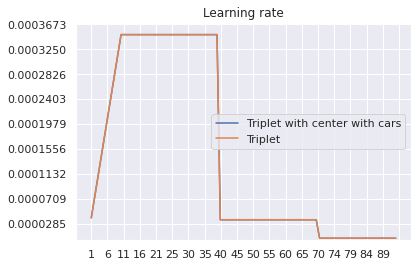

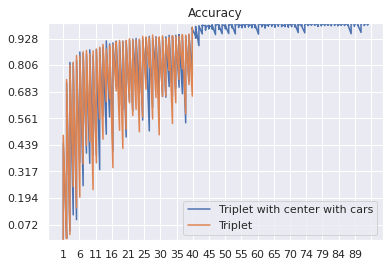

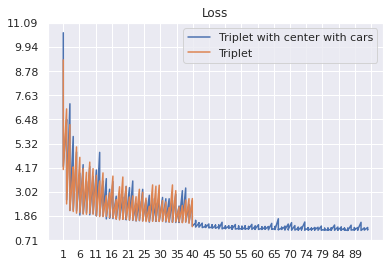

In [11]:
import seaborn as sns

sns.set()

plt.title('Learning rate')
plt.plot(Epoch,Lr,label='Triplet with center with cars')
plt.plot(simulation1[0][:],simulation1[1][:].astype(np.float),label='Triplet')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,93,20))
ax.set_ylim((0,0.00037))

plt.figure()
plt.title('Accuracy')
plt.plot(Epoch,Acc,label='Triplet with center with cars')
plt.plot(simulation[0][:]-1,simulation[2][:],label='Triplet')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,93,20))
ax.set_ylim((0,1))

plt.figure()
plt.title('Loss')
plt.plot(Epoch,Loss,label='Triplet with center with cars')
plt.plot(simulation[0][:]-1,simulation[3][:],label='Triplet')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,93,20))
